In [2]:
import sklearn
import numpy as np
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')

def plot_color_image(image):
    plt.imshow(image, interpolation='nearest')
    plt.axis('off')

# Vertical and horizontal kernel(filters)

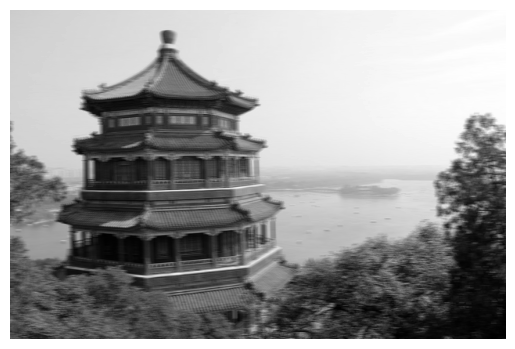

In [38]:
from sklearn.datasets import load_sample_image

china=load_sample_image('china.jpg')/255
flower=load_sample_image('flower.jpg')/255

images=np.array([china, flower])

batchsize, height, width, channels = images.shape
filters= np.zeros(shape=((7,7,channels,2)), dtype=np.float32) # Creating 2 filters
filters[:,3,:,0] = 1 # Vertical line(filling them with 1's)
filters[3,:,:,1] = 1 # Horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding='VALID')


plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off")  
plt.show()

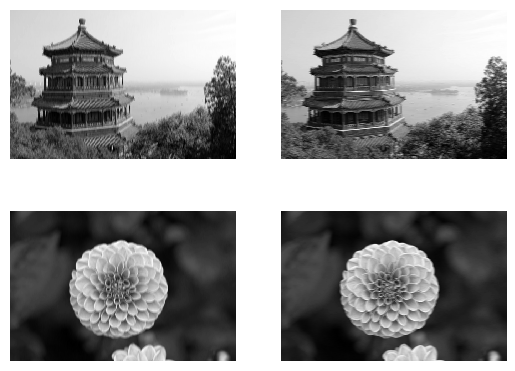

In [41]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

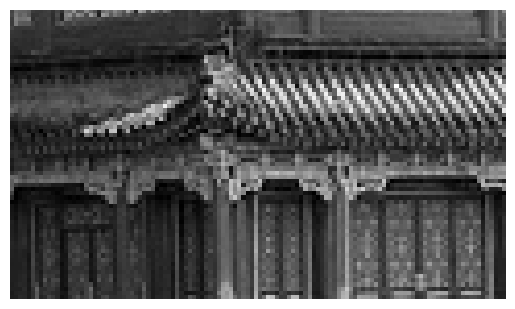

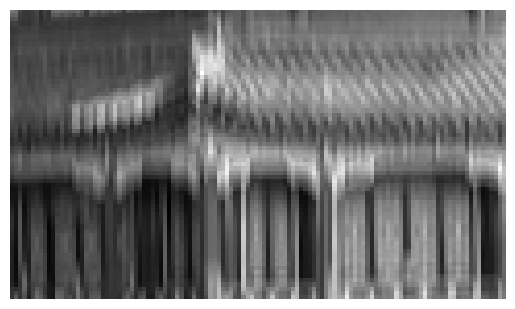

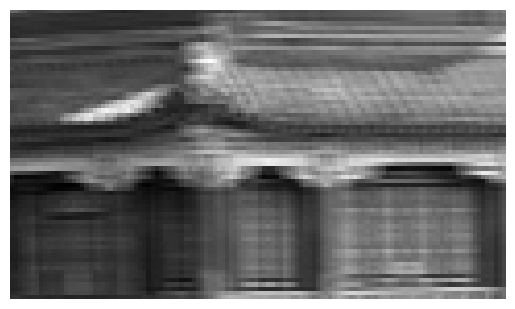

In [44]:
def crop(images):
    return images[150:220, 130:250]

plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

In [39]:
#this is how padding = same and valid handels the inputs data

"""If you like ascii art:

    "VALID" = without padding:

       inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)
                      |________________|                dropped
                                     |_________________|

    "SAME" = with zero padding:

                   pad|                                      |pad
       inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0
                   |________________|
                                  |_________________|
                                                 |________________|

In this example:

    Input width = 13
    Filter width = 6
    Stride = 5"""

# ^^^^ remove the """ """ to make to colorfull

'If you like ascii art:\n\n    "VALID" = without padding:\n\n       inputs:         1  2  3  4  5  6  7  8  9  10 11 (12 13)\n                      |________________|                dropped\n                                     |_________________|\n\n    "SAME" = with zero padding:\n\n                   pad|                                      |pad\n       inputs:      0 |1  2  3  4  5  6  7  8  9  10 11 12 13|0  0\n                   |________________|\n                                  |_________________|\n                                                 |________________|\n\nIn this example:\n\n    Input width = 13\n    Filter width = 6\n    Stride = 5'

In [45]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding="same", activation="relu")

"""
filters = 32 specifies the number of filters that the convolutional layer will learn and apply.
with 3x3 kernel size
"""

'\nfilters = 32 specifies the number of filters that the convolutional layer will learn and apply.\nwith 3x3 kernel size\n'